# ¿?
 - Diferencia entre fondo s2, nada y s22
 - Diferencia entre superficie s1 y nada

 - Apertura y cierre, se conoce la hora??
 - Y luego hay dos compuertas o solo uno o como va eso??

 - Puede haber outliers?

In [1]:
!pip list

Package                 Version
----------------------- -----------
absl-py                 2.1.0
alembic                 1.13.2
asttokens               2.4.1
astunparse              1.6.3
boto3                   1.34.99
botocore                1.34.99
branca                  0.7.1
catboost                1.2.5
certifi                 2024.2.2
cftime                  1.6.3
charset-normalizer      3.3.2
click                   8.1.7
cloudpickle             3.0.0
colorama                0.4.6
colorlog                6.8.2
comm                    0.2.1
contourpy               1.2.0
cycler                  0.12.1
Cython                  3.0.10
debugpy                 1.8.1
decorator               5.1.1
dm-tree                 0.1.8
einops                  0.8.0
et-xmlfile              1.1.0
executing               2.0.1
filelock                3.14.0
flatbuffers             24.3.7
folium                  0.16.0
fonttools               4.49.0
fsspec                  2024.3.1
gast           


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Librerías

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Constantes

In [3]:
COLORES = ["cornflowerblue", "mediumpurple", "indianred", "mediumseagreen", 'gold']

FICHERO_DATOS = './data/datos_laguna_unificados.csv'
FICHERO_HIST = './data/datos_historico.csv'



# Carga de datos

In [4]:
data = pd.read_csv(FICHERO_DATOS)

data['date'] = pd.to_datetime(data['date'])  
data = data.sort_values(by='date')

# Reiniciar los índices después de ordenar
data = data.reset_index(drop=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6916 entries, 0 to 6915
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        6916 non-null   datetime64[ns]
 1   fondo       6217 non-null   float64       
 2   superficie  6215 non-null   float64       
 3   ambiente    2559 non-null   float64       
 4   nivel       2344 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 270.3 KB


In [6]:
data.isnull().sum()

date             0
fondo          699
superficie     701
ambiente      4357
nivel         4572
dtype: int64

# Análisis descriptivo

In [7]:
data[["fondo", "superficie", "ambiente", "nivel"]].describe()

,fondo,superficie,ambiente,nivel
count,6217.000000,6215.000000,2559.000000,2344.000000
mean,25.097091,25.768788,23.323365,40.357125
std,8.657811,9.483440,6.242040,7.540611
min,9.060000,-42.330000,4.288000,-6.000000
25%,15.250000,15.060000,19.415500,35.000000
50%,29.500000,30.310000,25.600000,40.000000
75%,32.000000,32.590000,27.885750,46.000000
max,42.080000,41.140000,35.280000,56.200000


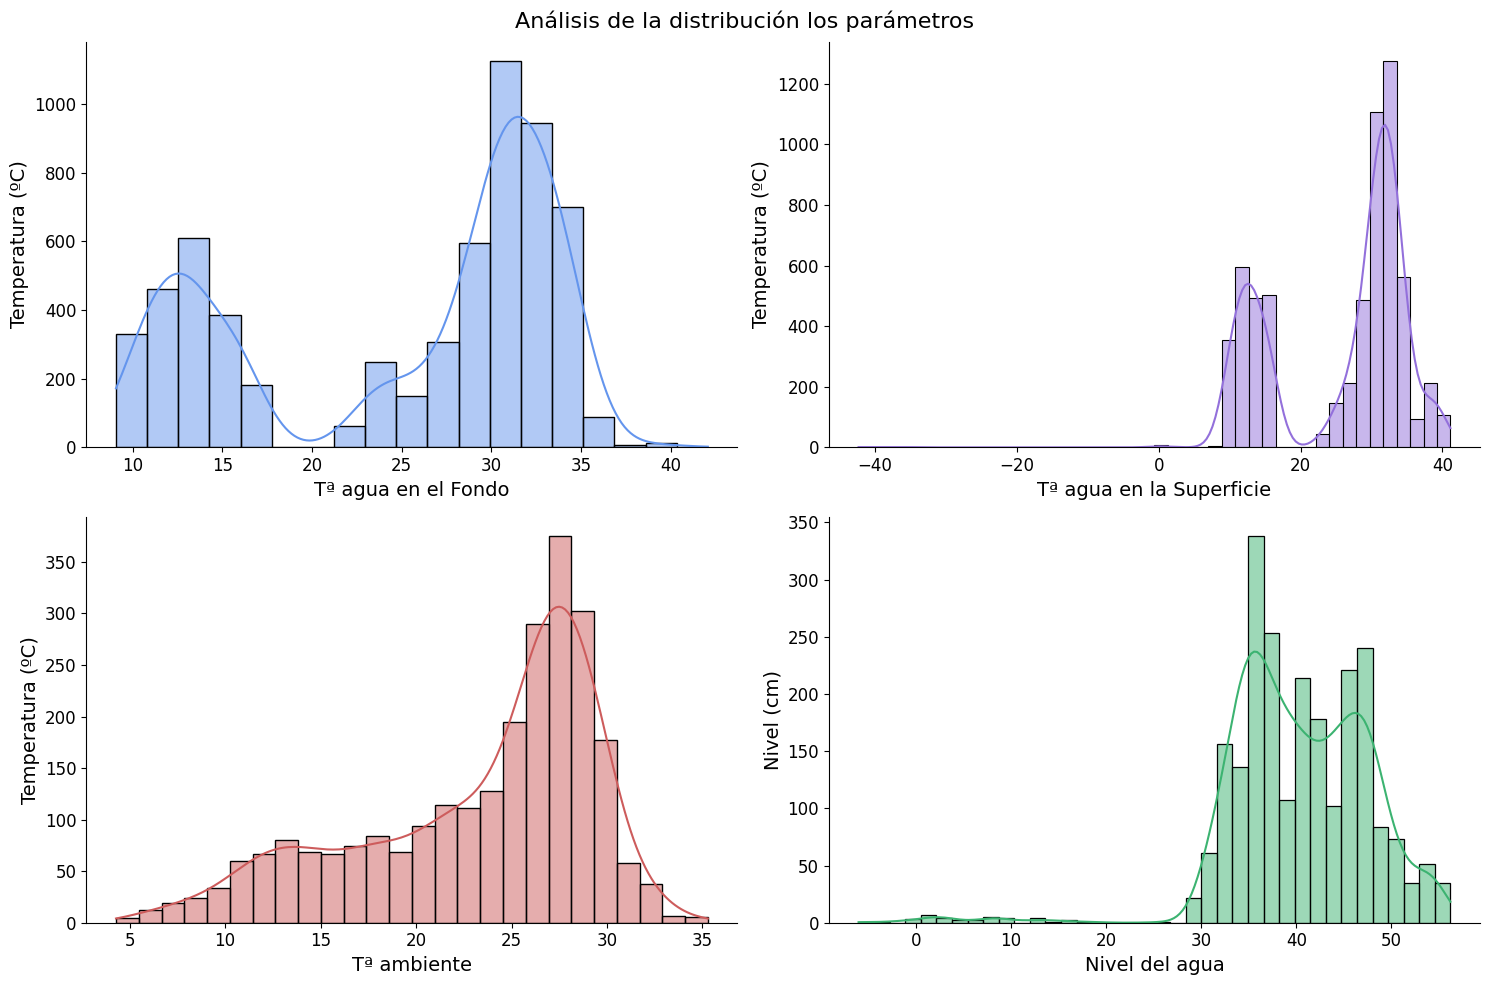

In [8]:
plt.figure(figsize=(15, 10))
plt.suptitle('Análisis de la distribución los parámetros', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])


# Histograma de Temperatura en Fondo
ax1 = plt.subplot(2, 2, 1)
sns.histplot(data=data, x='fondo', kde=True, color=COLORES[0])
ax1.set_title('')
ax1.spines['top'].set_visible(False)  
ax1.spines['right'].set_visible(False)
ax1.set_ylabel('Temperatura (ºC)', fontsize=14) 
ax1.set_xlabel('Tª agua en el Fondo', fontsize=14) 
# Ajustar el tamaño de las etiquetas de los ejes
ax1.tick_params(axis='both', which='major', labelsize=12)


# Histograma de Temperatura en Superficie
ax2 = plt.subplot(2, 2, 2)
sns.histplot(data=data, x='superficie', kde=True, color=COLORES[1])
ax2.set_title('')
ax2.spines['top'].set_visible(False)  
ax2.spines['right'].set_visible(False)
ax2.set_ylabel('Temperatura (ºC)', fontsize=14)  
ax2.set_xlabel('Tª agua en la Superficie', fontsize=14) 
ax2.tick_params(axis='both', which='major', labelsize=12)

# Histograma de Temperatura Ambiente
ax3 = plt.subplot(2, 2, 3)
sns.histplot(data=data, x='ambiente', kde=True, color=COLORES[2])
ax3.set_title('')
ax3.spines['top'].set_visible(False)  
ax3.spines['right'].set_visible(False)
ax3.set_ylabel('Temperatura (ºC)', fontsize=14) 
ax3.set_xlabel('Tª ambiente', fontsize=14) 
ax3.tick_params(axis='both', which='major', labelsize=12)

# Histograma del Nivel del Agua
ax4 = plt.subplot(2, 2, 4)
sns.histplot(data=data, x='nivel', kde=True, color=COLORES[3])
ax4.set_title('')
ax4.spines['top'].set_visible(False)  
ax4.spines['right'].set_visible(False)
ax4.set_ylabel('Nivel (cm)', fontsize=14)  
ax4.set_xlabel('Nivel del agua', fontsize=14) 
ax4.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()

# Guardar el gráfico en una carpeta con buena resolución
plt.savefig(f"histogramas.png", dpi=300, bbox_inches='tight')
plt.show()

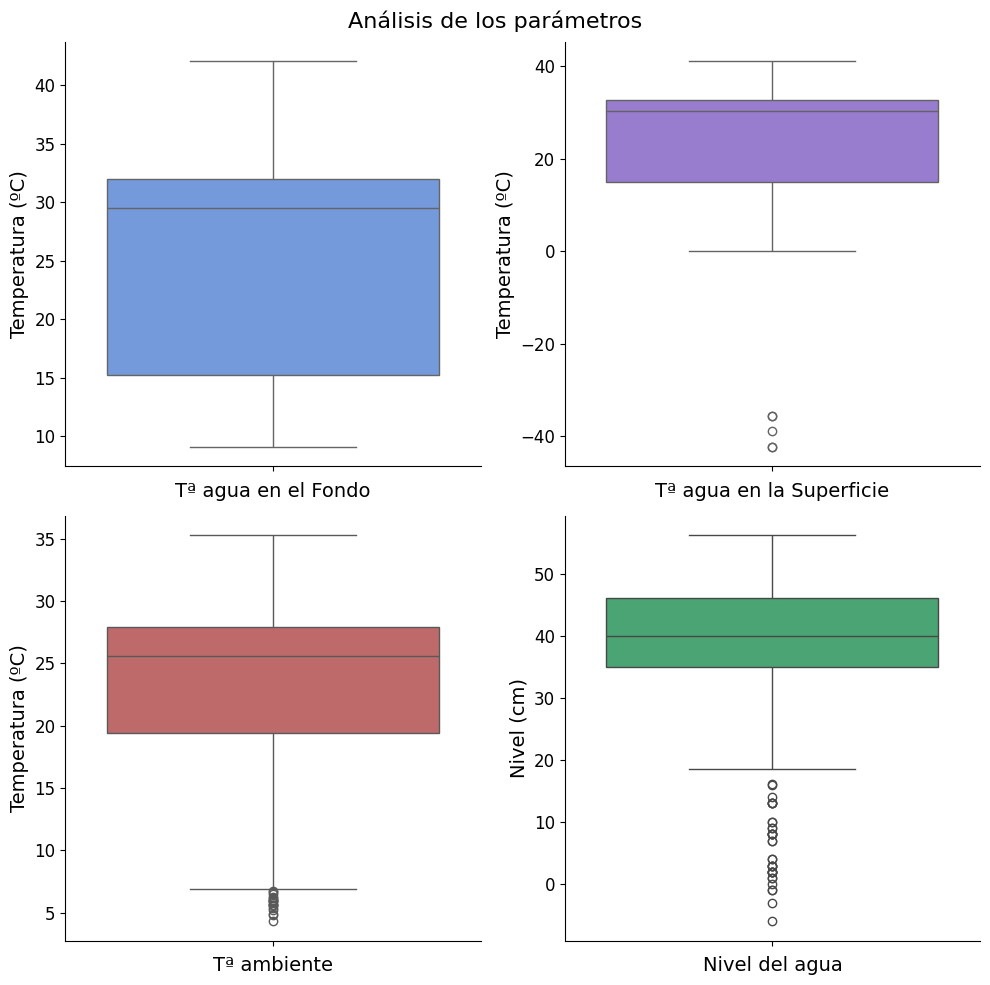

In [9]:

# Boxplot de las temperaturas en fondo, superficie y ambiente
plt.figure(figsize=(10, 10))
plt.suptitle('Análisis de los parámetros', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.subplot(2, 2, 1)

ax1 = sns.boxplot(data=data, y='fondo', color = COLORES[0])
# plt.title('Boxplot de Temperatura en Fondo')
ax1.spines['top'].set_visible(False)  
ax1.spines['right'].set_visible(False)
ax1.set_ylabel('Temperatura (ºC)', fontsize=14) 
ax1.set_xlabel('Tª agua en el Fondo', fontsize=14) 
ax1.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(2, 2, 2)
ax2 = sns.boxplot(data=data, y='superficie', color = COLORES[1])
# plt.title('Boxplot de Temperatura en Superficie')
ax2.spines['top'].set_visible(False)  
ax2.spines['right'].set_visible(False)
ax2.set_ylabel('Temperatura (ºC)', fontsize=14)  
ax2.set_xlabel('Tª agua en la Superficie', fontsize=14) 
ax2.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(2, 2, 3)
ax3 = sns.boxplot(data=data, y='ambiente', color = COLORES[2])
# plt.title('Boxplot de Temperatura Ambiente')
ax3.spines['top'].set_visible(False)  
ax3.spines['right'].set_visible(False)
ax3.set_ylabel('Temperatura (ºC)', fontsize=14) 
ax3.set_xlabel('Tª ambiente', fontsize=14) 
ax3.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(2, 2, 4)
ax4 = sns.boxplot(data=data, y='nivel', color = COLORES[3])
# plt.title('Boxplot de Nivel del agua')
ax4.spines['top'].set_visible(False)  
ax4.spines['right'].set_visible(False)
ax4.set_ylabel('Nivel (cm)', fontsize=14)  
ax4.set_xlabel('Nivel del agua', fontsize=14) 
ax4.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()

# Guardar el gráfico en una carpeta con buena resolución
plt.savefig(f"boxplots.png", dpi=300, bbox_inches='tight')
plt.show()

C:\Users\Vir\AppData\Local\Temp\ipykernel_2220\591928889.py:35: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


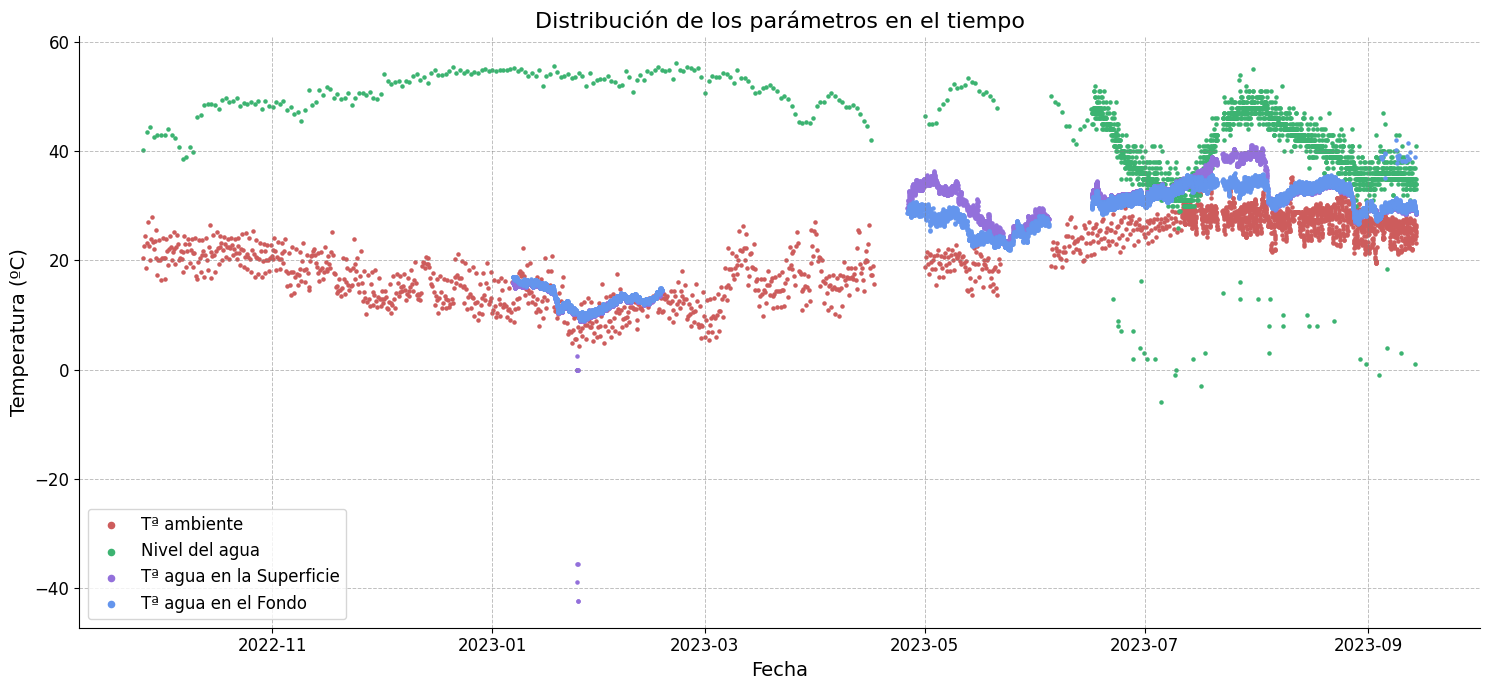

In [10]:
# Convierte la columna 'date' a tipo datetime
data['date'] = pd.to_datetime(data['date'])

# Configuración del gráfico
plt.figure(figsize=(15,7))
# Configuración de los ejes y títulos
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Temperatura (ºC)', fontsize=14)
plt.title(f'Distribución de los parámetros en el tiempo', fontsize=16)

# Quitar los bordes superior y derecho
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ajustar el tamaño de las etiquetas de los ejes
ax.tick_params(axis='both', which='major', labelsize=12)

# Configurar la cuadrícula
ax.grid(True, which='both', linestyle='--', linewidth=0.7, color='grey', alpha = 0.5)


# Gráfico de dispersión para 'fondo', 'superficie' y 'ambiente'
plt.scatter(data['date'], data['ambiente'], label='Tª ambiente', marker='o', alpha=1, color = COLORES[2], s=5)
plt.scatter(data['date'], data['nivel'], label='Nivel del agua', marker='o', alpha=1, color = COLORES[3], s=5)

plt.scatter(data['date'], data['superficie'], label='Tª agua en la Superficie', marker='o', alpha=1, color = COLORES[1], s=5)
plt.scatter(data['date'], data['fondo'], label='Tª agua en el Fondo', marker='o', alpha=1, color = COLORES[0], s=5)

# # Mostrar una leyenda en la parte superior izquierda
# plt.legend(loc='upper left')
# Ajustar el tamaño de la leyenda
plt.legend(fontsize=12)
legend = ax.legend(fontsize=12)
for handle in legend.legendHandles:
    handle._sizes = [20]  # Ajusta el tamaño de los marcadores en la leyenda





# Mostrar el gráfico
plt.tight_layout()
# Guardar el gráfico en una carpeta con buena resolución
plt.savefig(f"dispersion_inicial.png", dpi=300, bbox_inches='tight')
plt.show()

In [11]:
data_filled = data.fillna(0)

correlacion = data_filled[['fondo', 'superficie', 'ambiente', 'nivel']].corr()

correlacion

,fondo,superficie,ambiente,nivel
fondo,1.000000,0.983160,0.167465,0.386749
superficie,0.983160,1.000000,0.170257,0.376446
ambiente,0.167465,0.170257,1.000000,0.676573
nivel,0.386749,0.376446,0.676573,1.000000


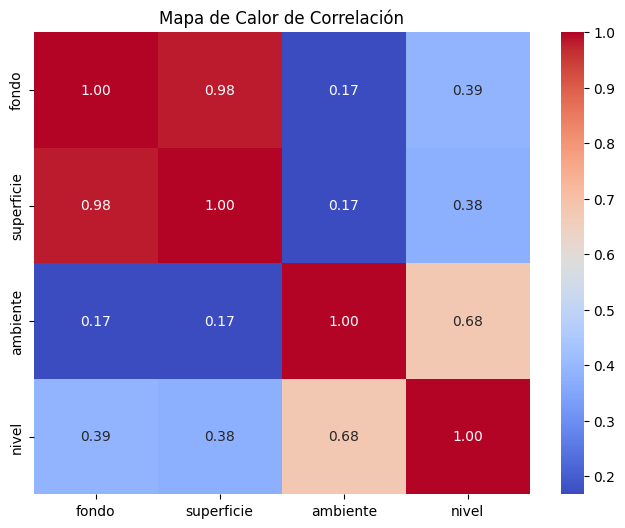

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación')
plt.show()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6916 entries, 0 to 6915
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        6916 non-null   datetime64[ns]
 1   fondo       6217 non-null   float64       
 2   superficie  6215 non-null   float64       
 3   ambiente    2559 non-null   float64       
 4   nivel       2344 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 270.3 KB


# Datos AEMET

## Carga datos

In [14]:
data_hist = pd.read_csv(FICHERO_HIST)

data_hist['fecha'] = pd.to_datetime(data_hist['fecha'], format='%d/%m/%Y')  
data_hist = data_hist.sort_values(by='fecha')

# Reiniciar los índices después de ordenar
data_hist = data_hist.reset_index(drop=True)

# data_hist.set_index('fecha', inplace=True)

In [15]:
data_hist

,fecha,ambiente
0,1947-01-01,13.0
1,1947-01-02,9.0
2,1947-01-03,10.5
3,1947-01-04,9.5
4,1947-01-05,8.5
...,...,...
22244,2007-11-26,13.5
22245,2007-11-27,13.5
22246,2007-11-28,13.2
22247,2007-11-29,14.8


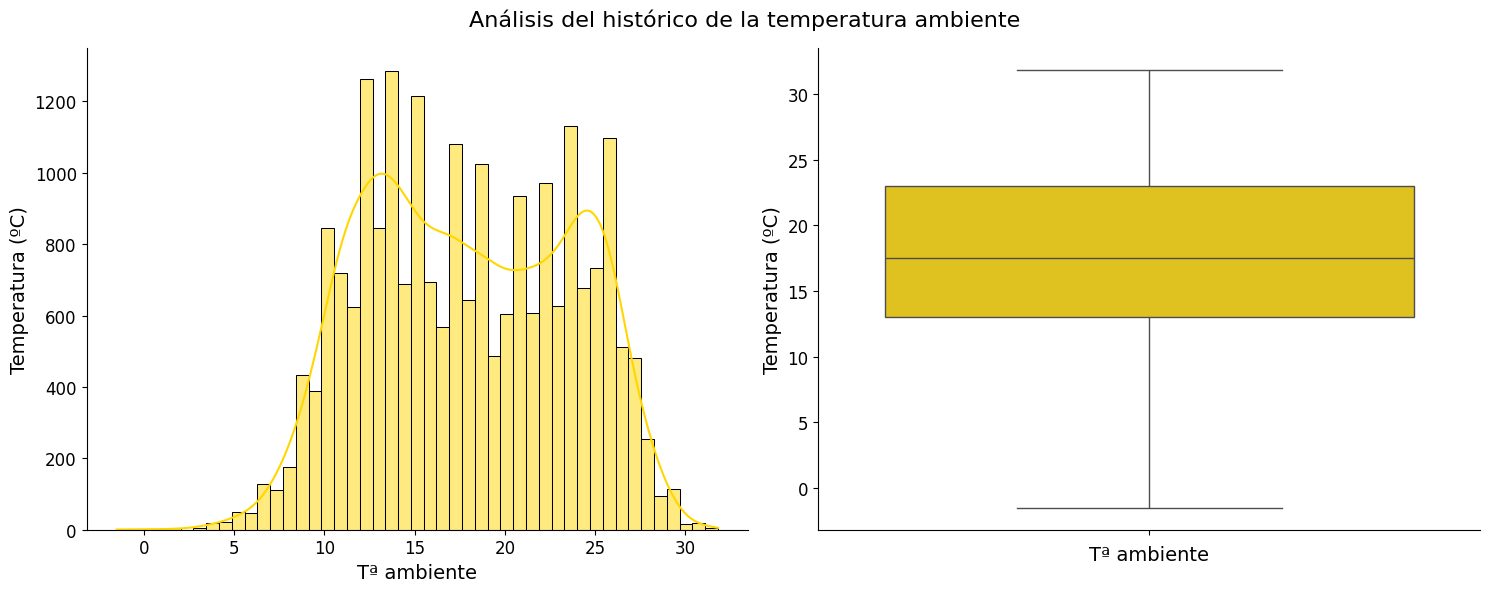

In [16]:
plt.figure(figsize=(15, 6))
plt.suptitle('Análisis del histórico de la temperatura ambiente', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])


# Histograma de Temperatura en Fondo
ax1 = plt.subplot(1, 2, 1)
sns.histplot(data=data_hist, x='ambiente', kde=True, color=COLORES[4])
ax1.set_title('')
ax1.spines['top'].set_visible(False)  
ax1.spines['right'].set_visible(False)
ax1.set_ylabel('Temperatura (ºC)', fontsize=14) 
ax1.set_xlabel('Tª ambiente', fontsize=14) 
ax1.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(1, 2, 2)
ax2 = sns.boxplot(data=data_hist, y='ambiente', color = COLORES[4])
plt.title('')
ax2.spines['top'].set_visible(False)  
ax2.spines['right'].set_visible(False)
ax2.set_ylabel('Temperatura (ºC)', fontsize=14) 
ax2.set_xlabel('Tª ambiente', fontsize=14) 
ax2.tick_params(axis='both', which='major', labelsize=12)


plt.tight_layout()

# Guardar el gráfico en una carpeta con buena resolución
plt.savefig(f"histo_AEMET.png", dpi=300, bbox_inches='tight')
plt.show()

In [17]:
data_hist.describe()

,fecha,ambiente
count,22249,22249.000000
mean,1977-06-16 00:00:00.000000032,17.920181
min,1947-01-01 00:00:00,-1.500000
25%,1962-03-25 00:00:00,13.000000
50%,1977-06-16 00:00:00,17.500000
75%,1992-09-07 00:00:00,23.000000
max,2007-11-30 00:00:00,31.800000
std,NaN,5.655156


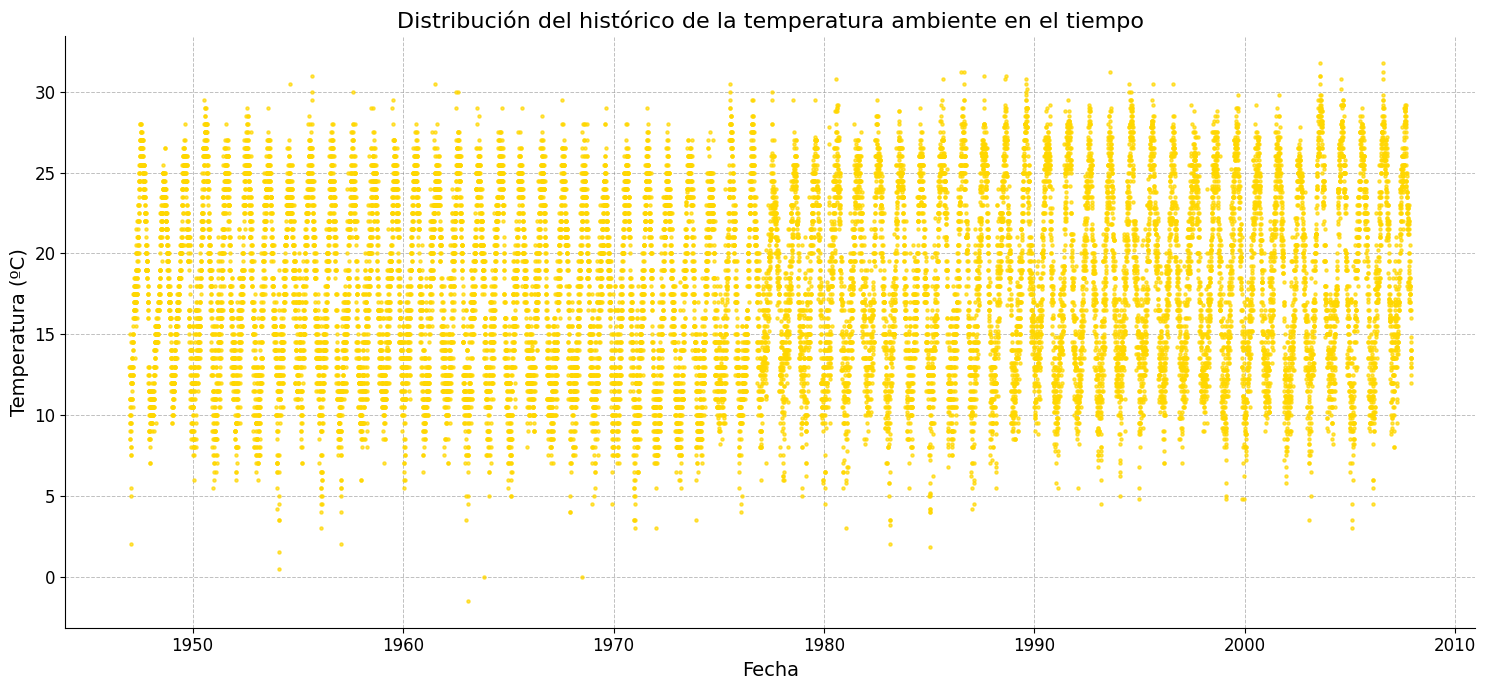

In [20]:
# Convierte la columna 'date' a tipo datetime
data_hist['fecha'] = pd.to_datetime(data_hist['fecha'])

# Configuración de los ejes y títulos
plt.figure(figsize=(15,7))
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Temperatura (ºC)', fontsize=14)
plt.title('Distribución del histórico de la temperatura ambiente en el tiempo', fontsize=16)

# Quitar los bordes superior y derecho
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ajustar el tamaño de las etiquetas de los ejes
ax.tick_params(axis='both', which='major', labelsize=12)

# Gráfico de dispersión para 'fondo', 'superficie' y 'ambiente'
plt.scatter(data_hist['fecha'], data_hist['ambiente'], marker='o', alpha=0.7, color = COLORES[4], s = 5, zorder = 3)

# Configurar la cuadrícula
ax.grid(True, which='both', linestyle='--', linewidth=0.7, color='grey', alpha = 0.5, zorder = 2)

plt.tight_layout()

# Guardar el gráfico en una carpeta con buena resolución
plt.savefig(f"dispersion_AEMET.png", dpi=300, bbox_inches='tight')
plt.show()

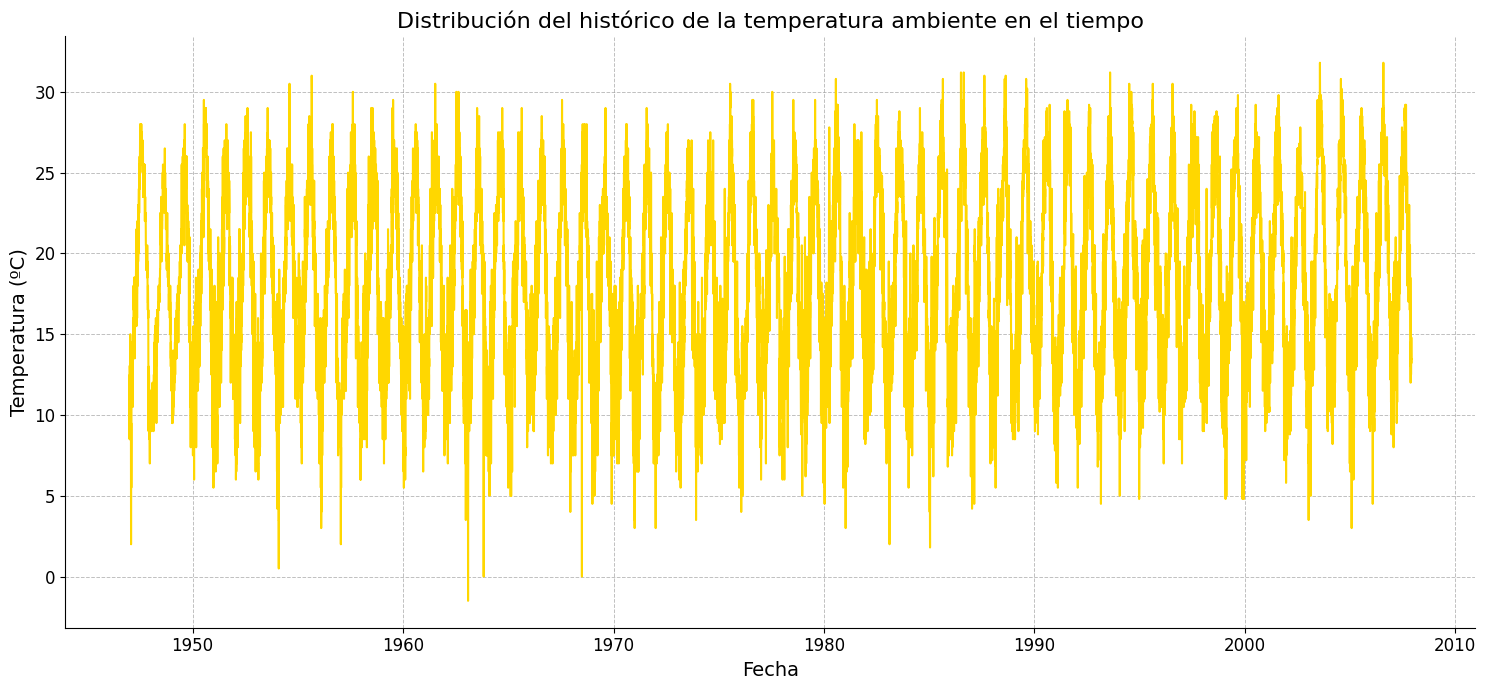

In [22]:
# Convierte la columna 'date' a tipo datetime
data_hist['fecha'] = pd.to_datetime(data_hist['fecha'])

# Configuración de los ejes y títulos
plt.figure(figsize=(15,7))
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Temperatura (ºC)', fontsize=14)
plt.title('Distribución del histórico de la temperatura ambiente en el tiempo', fontsize=16)

# Quitar los bordes superior y derecho
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ajustar el tamaño de las etiquetas de los ejes
ax.tick_params(axis='both', which='major', labelsize=12)

# Gráfico de dispersión para 'fondo', 'superficie' y 'ambiente'
plt.plot(data_hist['fecha'], data_hist['ambiente'], color = COLORES[4], zorder = 3)

# Configurar la cuadrícula
ax.grid(True, which='both', linestyle='--', linewidth=0.7, color='grey', alpha = 0.5, zorder = 2)

plt.tight_layout()

# Guardar el gráfico en una carpeta con buena resolución
plt.savefig(f"evolucion_AEMET.png", dpi=300, bbox_inches='tight')
plt.show()